## Classifying digits

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

scaling the pixel values

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Viewing few images and labels

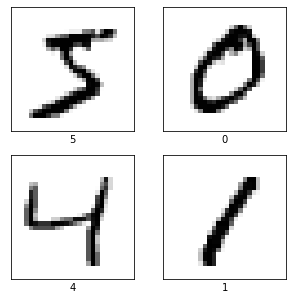

In [7]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Model building

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.9263
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1163 - accuracy: 0.9664
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0798 - accuracy: 0.9762
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9850
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0902 - accuracy: 0.9789

Test accuracy: 0.9789000153541565


We got accuracy of 97%

### Predict

In [16]:
pred1=model.predict(test_images)
np.argmax(pred1[20])

9

In [17]:
test_labels[20]

9

Applying Softmax layer to get probabilities

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
pred2=probability_model.predict(test_images)

In [20]:
np.argmax(pred2[20])

9

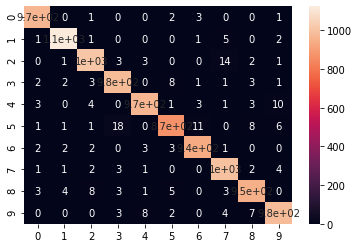

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
_=sns.heatmap(confusion_matrix(list(map(lambda x: np.argmax(x),pred2)),test_labels),annot=True)